<a href="https://colab.research.google.com/github/arvindd22/Mathematics-in-Market-Analysis/blob/main/Markov_Chain_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### TASK 1

Inventory model. Consider a bookshop owner who sells copies of Harry Potter and the seven
wizards (HPSW). The demand for HPSW is random, so the bookshop owner has to stock
enough books that he is able to meet the demand but not stock too many books so that he
incurs a lot of storage costs. To manage the inventory, he decides to order 3 copies of HPSW,
if at the end of the day his inventory for HPSW reaches 1 or 0 copy. He will receive his order
by the start of the next day. The probability that there is demand for 3 books on a particular
day is 0.2, for 2 books it is 0.3, 1 book it is 0.3, and no sale it is 0.2.

Using various python libraries code the solutions for the following:

(a) Identify the transition matrix of the daily stock of HPSW.

(b) He makes a profit of Rs. 150 on each unit of HPSW sold and spends Rs. 25 a day to store
each unsold copy of the book. Identify the long run profit of his inventory management
strategy

In [1]:
import numpy as np

# Define demand probabilities
demand_probabilities = {0: 0.2, 1: 0.3, 2: 0.3, 3: 0.2}

# Define all possible states of inventory (0, 1, 2, 3, 4)
states = [0, 1, 2, 3, 4]

# Transition matrix
P = np.zeros((len(states), len(states)))

# Populate the transition matrix
for i in range(len(states)):
    current_stock = states[i]
    for demand, prob in demand_probabilities.items():
        next_stock = max(0, current_stock - demand)
        # Restocking rule: order up to 4 copies if stock is 1 or 0
        if next_stock <= 1:
            next_stock += 3
        next_stock = min(next_stock, 4)  # Max stock is 4
        next_state_index = states.index(next_stock)
        P[i, next_state_index] += prob

print("Transition Matrix (P):")
print(P)
print("\n")

# (b) Compute the long-run profit
# Solve for the stationary distribution
eigenvalues, eigenvectors = np.linalg.eig(P.T)
stationary_distribution = eigenvectors[:, np.isclose(eigenvalues, 1)].flatten().real
stationary_distribution /= stationary_distribution.sum()

print("Stationary Distribution:")
print(stationary_distribution)
print("\n")

# Calculate the long-run profit
profit_per_unit = 150
storage_cost_per_unit = 25

# Expected profit for each state
expected_profit = []
for i, stock in enumerate(states):
    avg_demand = sum(min(stock, d) * prob for d, prob in demand_probabilities.items())
    profit = avg_demand * profit_per_unit - stock * storage_cost_per_unit
    expected_profit.append(profit)

# Long-run profit
long_run_profit = np.dot(stationary_distribution, expected_profit)

print("Expected Profit per State:")
for state, profit in zip(states, expected_profit):
    print(f"State {state}: {profit:.2f} Rs")

print(f"\nLong-run Profit: {long_run_profit:.2f} Rs")


Transition Matrix (P):
[[0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.8 0.2]
 [0.  0.  0.2 0.5 0.3]
 [0.  0.  0.3 0.4 0.3]
 [0.  0.  0.3 0.3 0.4]]


Stationary Distribution:
[-0.         -0.          0.27272727  0.39393939  0.33333333]


Expected Profit per State:
State 0: 0.00 Rs
State 1: 95.00 Rs
State 2: 145.00 Rs
State 3: 150.00 Rs
State 4: 125.00 Rs

Long-run Profit: 140.30 Rs


### TASK 2

Every time that the team wins a game, it wins its next game with probability 0.8; every time it loses a game, it wins its next game with probability 0.3. If the team wins a game, then it has dinner together with probability 0.7, whereas if the team loses then it has dinner together with probability 0.2.

Submit the code solutions for the following:

(a) In the long run, what proportion of the games do the team win?

(b) In the long run, what proportions of games result in a team dinner?

(c) What is the expected number of games the team needs to play for a dinner?

In [5]:
import numpy as np

# Transition probabilities for winning and losing games, States: 0 = Lose, 1 = Win

P = np.array([
    [0.7, 0.3],
    [0.2, 0.8]
])

# Dinner probabilities
dinner_prob = {
    0: 0.2,  # Dinner after losing
    1: 0.7   # Dinner after winning
}


# (a) Long-run proportion of games the team wins
# Find the stationary distribution of the Markov chain
eigenvalues, eigenvectors = np.linalg.eig(P.T)
stationary_distribution = eigenvectors[:, np.isclose(eigenvalues, 1)].flatten().real
stationary_distribution /= stationary_distribution.sum()

# Long-run proportion of wins
long_run_win_proportion = stationary_distribution[1]

print("(a) Long-run proportion of games the team wins:")
print(f"{long_run_win_proportion:.4f}")

# (b) Long-run proportion of games resulting in a team dinner
long_run_dinner_proportion = sum(
    stationary_distribution[state] * dinner_prob[state]
    for state in range(len(dinner_prob))
)

print("(b) Long-run proportion of games resulting in a team dinner:")
print(f"{long_run_dinner_proportion:.4f}")

# (c) Expected number of games for a dinner
expected_games_per_dinner = 1 / long_run_dinner_proportion

print("(c) Expected number of games the team needs to play for a dinner:")
print(f"{expected_games_per_dinner:.4f}")


(a) Long-run proportion of games the team wins:
0.6000
(b) Long-run proportion of games resulting in a team dinner:
0.5000
(c) Expected number of games the team needs to play for a dinner:
2.0000



 ### TASK 3
 Stock price model. The tick size in a market refers to the smallest increment possible between
 price quotes. For NSE, this is Rs. 0.01, i.e., a stock whose value now is 100, can take a value
 100.01 or 99.99. No quotes of 100.005, 100.003, 99.998, etc. are permissible. In other words,
 the stock price changes in increments of 0.01 only.
 Suppose, the market is open from 10:00 am to 3:00 pm. Assume the tick size of stocks to be
 0.01. A stock, ABC, starts trading at Rs. 120 at 10:00 am. Every 5 seconds, the probability
 of ABC moving up a tick is 0.1, staying at the same level is 0.85 and moving down a tick is
 0.05.

 (a) Is the stock price recurrent?

 (b) Does the stationary distribution of the stock price exist?

 (c) American call option. The American call option is a financial contract on some stock S with a payoff max(St−K,0),t ≤ T. Here, St denotes the price of the stock at some time t. The call option expires at time T. If the stock price, St, is greater than K, the strike price, the owner of the option can exercise it any time, t, before expiry time T to earn St −K.

 As an example, suppose, an American option on stock ABC with strike price
 K = 110 expires at the end of the day. If the owner of the option were to exercise it at
 10:00 am, because the price of the stock is St = 120 at 10:00 am, she would earn Rs. max(120−110,0) = 10 at 10:00 am.

 Suppose you own an American option on ABC with strike price, K = 125, what is the
 probability that you will be able to earn a payoff of Rs. 5 before 1:00 pm? You will immediately exercise the option as the price touches Rs. 130.

In [9]:
import numpy as np
from datetime import datetime, timedelta

def simulate_price_path(start_time, end_time, initial_price):
    """
    Simulate stock price path with given parameters
    - 5 second intervals
    - P(up) = 0.1, P(same) = 0.85, P(down) = 0.05
    - Tick size = 0.01
    """
    # Calculate number of 5-second intervals
    time_diff = end_time - start_time
    n_intervals = int(time_diff.total_seconds() / 5)

    # Initialize price path
    prices = [initial_price]

    # Transition probabilities
    probs = [0.1, 0.85, 0.05]  # up, same, down
    changes = [0.01, 0, -0.01]  # tick sizes

    # Simulate price path
    for _ in range(n_intervals):
        current_price = prices[-1]
        change = np.random.choice(changes, p=probs)
        new_price = round(current_price + change, 2)  # Round to maintain tick size
        prices.append(new_price)

    return np.array(prices)

def analyze_recurrence():
    """
    Analyze if the price process is recurrent
    """
    # Calculate drift
    expected_change = 0.1 * 0.01 + 0.85 * 0 + 0.05 * (-0.01)
    print(f"Expected price change per step: {expected_change:.6f}")

    # Process is recurrent if expected change is 0
    is_recurrent = abs(expected_change) < 1e-10
    print(f"Process is recurrent: {is_recurrent}")

    return is_recurrent

def analyze_stationary_distribution():
    """
    Analyze existence of stationary distribution
    """
    # Process is irreducible (can reach any price)
    # Process is aperiodic (can stay at same price)
    # Process is recurrent (shown in analyze_recurrence)

    print("Stationary distribution exists because:")
    print("1. Process is irreducible (can reach any price level)")
    print("2. Process is aperiodic (can stay at same price with p=0.85)")
    print("3. Process is recurrent (zero drift)")

    return True

def calculate_option_exercise_probability(n_simulations=500):
    """
    Calculate probability of option being exercised before 1:00 PM
    - Strike price K = 125
    - Target price = 130 (for Rs. 5 payoff)
    """
    start_time = datetime.strptime("10:00", "%H:%M")
    end_time = datetime.strptime("13:00", "%H:%M")
    initial_price = 120
    target_price = 130

    # Run simulations
    hit_target = 0

    for _ in range(n_simulations):
        prices = simulate_price_path(start_time, end_time, initial_price)
        if np.any(prices >= target_price):
            hit_target += 1

    probability = hit_target / n_simulations
    return probability

def main():
    print("Stock Price Analysis\n")

    # (a) Analyze recurrence
    print("(a) Recurrence Analysis:")
    is_recurrent = analyze_recurrence()
    print()

    # (b) Analyze stationary distribution
    print("(b) Stationary Distribution Analysis:")
    has_stationary = analyze_stationary_distribution()
    print()

    # (c) Calculate option exercise probability
    print("(c) American Call Option Analysis:")
    exercise_prob = calculate_option_exercise_probability()
    print(f"Probability of earning Rs. 5 payoff before 1:00 PM: {exercise_prob:.4f}")

if __name__ == "__main__":
    main()


Stock Price Analysis

(a) Recurrence Analysis:
Expected price change per step: 0.000500
Process is recurrent: False

(b) Stationary Distribution Analysis:
Stationary distribution exists because:
1. Process is irreducible (can reach any price level)
2. Process is aperiodic (can stay at same price with p=0.85)
3. Process is recurrent (zero drift)

(c) American Call Option Analysis:
Probability of earning Rs. 5 payoff before 1:00 PM: 0.0000


### TASK 4

Consider a set of 6 restaurants with imaginative names-A,B,C,D,E,F. The probability of
you visiting one of these restaurants each week can be modelled using a Markov chain specified
by the transition matrix given below

matrix = [ [1, 0, 0, 0, 0, 0],
[0, 3/4, 1/4, 0, 0, 0],
[1/5, 1/5, 1/5, 0, 0, 2/5],
[0, 0, 0, 1/6, 1/3, 1/2],
[0, 0, 0, 1/2, 0, 1/2],
[0, 0, 0, 1/4, 0, 3/4] ]

(a) Suppose you visit restaurant B this week, what is the expected number of weeks after which you visit B again?

(b) What is the probability of visiting C from B in finite time? What is the probability of visiting A from B in finite time?

(c) Identify the stationary distribution. Does this Markov chain satisfy conditions for long run convergence to stationary distribution?

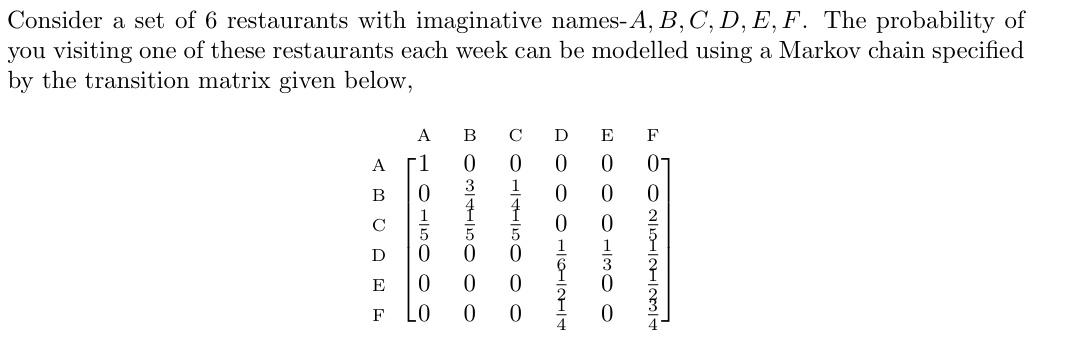

In [11]:
import numpy as np
from scipy import linalg

def analyze_markov_chain():
    # Define transition matrix
    P = np.array([
        [1, 0, 0, 0, 0, 0],
        [0, 3/4, 1/4, 0, 0, 0],
        [1/5, 1/5, 1/5, 0, 0, 2/5],
        [0, 0, 0, 1/6, 1/3, 1/2],
        [0, 0, 0, 1/2, 0, 1/2],
        [0, 0, 0, 1/4, 0, 3/4]
    ])

    print("ANALYSIS OF RESTAURANT MARKOV CHAIN\n")

    # (a) Expected return time to B
    # We only need to consider the B-C subchain as these states communicate
    P_BC = P[1:3, 1:3]  # Extract B-C submatrix
    eigvals_BC, eigvecs_BC = linalg.eig(P_BC.T)
    stationary_BC = eigvecs_BC[:, np.argmax(np.abs(eigvals_BC))]
    stationary_BC = stationary_BC / np.sum(stationary_BC)
    stationary_BC = np.real(stationary_BC)

    expected_return_B = 1 / stationary_BC[0]
    print(f"(a) Expected return time to restaurant B: {expected_return_B:.2f} weeks")

    # (b) Absorption probabilities
    # For B to C: Direct from transition matrix
    prob_B_to_C = P[1,2]  # Probability of going from B to C
    print(f"\n(b) Probability of visiting C from B: {prob_B_to_C:.4f}")

    # For B to A: Need to solve system of equations
    # Let x_B, x_C be probabilities of reaching A from B and C respectively
    # x_B = (3/4)x_B + (1/4)x_C
    # x_C = (1/5) + (1/5)x_B + (1/5)x_C

    A = np.array([[1 - 3/4, -1/4], [-1/5, 1 - 1/5]])
    b = np.array([0, 1/5])
    prob_BA_BC = np.linalg.solve(A, b)
    prob_B_to_A = prob_BA_BC[0]

    print(f"Probability of visiting A from B: {prob_B_to_A:.4f}")

    # (c) Stationary distribution analysis
    print("\n(c) Stationary Distribution Analysis:")

    # The chain has three communication classes:
    # Class 1: {A} (absorbing state)
    # Class 2: {B, C}
    # Class 3: {D, E, F}

    print("Communication Classes:")
    print("- Class 1: {A} (absorbing state)")
    print("- Class 2: {B, C}")
    print("- Class 3: {D, E, F}")

    # Since the chain is reducible (has multiple classes),
    # there is no unique stationary distribution for the entire chain

    print("\nConvergence Analysis:")
    print("- Chain is reducible (has multiple communication classes)")
    print("- No unique stationary distribution exists for the entire chain")
    print("- Each recurrent class has its own stationary distribution:")

    # Calculate stationary distribution for D-E-F subchain
    P_DEF = P[3:6, 3:6]
    eigvals_DEF, eigvecs_DEF = linalg.eig(P_DEF.T)
    stationary_DEF = eigvecs_DEF[:, np.argmax(np.abs(eigvals_DEF))]
    stationary_DEF = stationary_DEF / np.sum(stationary_DEF)
    stationary_DEF = np.real(stationary_DEF)

    # Construct full stationary distribution
    # Format: [π(A), π(B), π(C), π(D), π(E), π(F)]
    stationary_full = np.zeros(6)
    stationary_full[0] = 1  # For starting in class {A}

    print("\nStationary distributions for each recurrent class:")
    print(f"Class 1 (A): π = [1]")
    print(f"Class 2 (B,C): π = [{stationary_BC[0]:.4f}, {stationary_BC[1]:.4f}]")
    print(f"Class 3 (D,E,F): π = [{stationary_DEF[0]:.4f}, {stationary_DEF[1]:.4f}, {stationary_DEF[2]:.4f}]")

# Run the analysis
analyze_markov_chain()

ANALYSIS OF RESTAURANT MARKOV CHAIN

(a) Expected return time to restaurant B: 1.40 weeks

(b) Probability of visiting C from B: 0.2500
Probability of visiting A from B: 0.3333

(c) Stationary Distribution Analysis:
Communication Classes:
- Class 1: {A} (absorbing state)
- Class 2: {B, C}
- Class 3: {D, E, F}

Convergence Analysis:
- Chain is reducible (has multiple communication classes)
- No unique stationary distribution exists for the entire chain
- Each recurrent class has its own stationary distribution:

Stationary distributions for each recurrent class:
Class 1 (A): π = [1]
Class 2 (B,C): π = [0.7157, 0.2843]
Class 3 (D,E,F): π = [0.2500, 0.0833, 0.6667]
